In [1]:
!pip install tensorflow
!pip install opencv-python

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/asus/Desktop/Dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 21083 files belonging to 46 classes.
['Apple___Apple_scab', 'Apple___Apple_scab - Copy', 'Apple___Black_rot', 'Apple___Black_rot - Copy', 'Apple___Cedar_apple_rust', 'Apple___Cedar_apple_rust - Copy', 'Apple___healthy', 'Apple___healthy - Copy', 'Blueberry___healthy', 'Blueberry___healthy - Copy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___Powdery_mildew - Copy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy - Copy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot - Copy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_bl

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

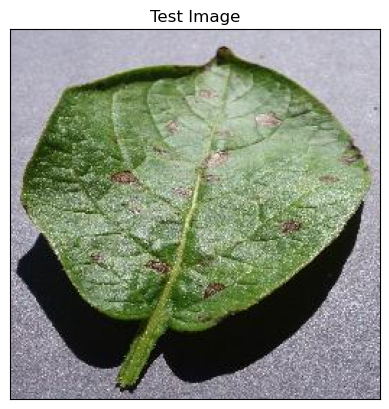

In [4]:
#Test Image Visualization
import cv2
image_path = "C:/Users/asus/Desktop/Plant Disease Detection System for Sustainable Agriculture/Plant Disease Detection System for Sustainable Agriculture/test/PotatoEarlyBlight5.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


In [6]:
print(predictions)

[[1.6727096e-06 2.2718614e-09 1.4767582e-10 1.1984183e-07 1.5887483e-10
  3.5514416e-10 4.1754416e-11 7.5720952e-10 1.7167801e-08 1.2075940e-13
  1.0790897e-12 4.4907434e-14 1.6803961e-11 1.8188347e-11 4.8876365e-13
  1.9611814e-12 1.9614522e-11 3.0740747e-13 6.0342980e-09 1.0217820e-09
  9.9998832e-01 6.0217808e-08 1.4807696e-07 1.2114848e-11 3.3965744e-10
  8.7710648e-09 1.3943367e-10 3.5019546e-10 7.7174954e-14 6.1221445e-11
  2.1040933e-06 1.1953188e-08 6.0752122e-06 5.9393144e-14 3.4751608e-09
  4.6055744e-15 1.3666378e-14 1.4706769e-06]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


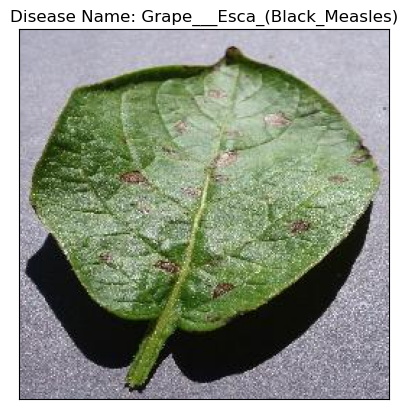

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
class_name = ["Healthy", "Disease A", "Disease B"]
result_index = 1  # Example index


In [11]:
user_feedback = input("Was this prediction correct? (yes/no): ")
if user_feedback.lower() == "no":
    print("Logging incorrect prediction for retraining...")


Was this prediction correct? (yes/no):  no


Logging incorrect prediction for retraining...


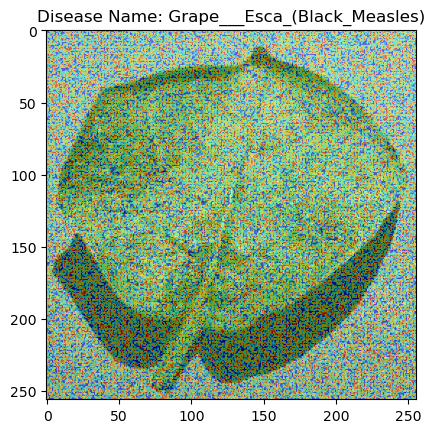

In [12]:
import numpy as np
heatmap = np.random.random(img.shape[:2])  # Example heatmap
plt.imshow(img)
plt.imshow(heatmap, alpha=0.5, cmap='jet')  # Overlay heatmap
plt.title(f"Disease Name: {model_prediction}")
plt.show()
